# Image Classifier

## Download data set

The following are executed on bash shell on Ubuntu.

Run the following commands to download the dataset

> cd data/ <br>
> wget http://www.vision.caltech.edu/Image_Datasets/Caltech256/256_ObjectCategories.tar
> tar -xf 256_ObjectCategories.tar
> ls 256_ObjectCategories.tar
> ls -F 256_ObjectCategories | head -5
>> 001.ak47/
>> 002.american-flag/
>> 003.backpack/
>> 004.baseball-bat/
>> 005.baseball-glove/

## View data

In [9]:
from fastai import *
from fastai.vision import *

In [10]:
path = Path('data/256_ObjectCategories')
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [11]:
data.classes

['001.ak47',
 '002.american-flag',
 '003.backpack',
 '004.baseball-bat',
 '005.baseball-glove',
 '006.basketball-hoop',
 '007.bat',
 '008.bathtub',
 '009.bear',
 '010.beer-mug',
 '011.billiards',
 '012.binoculars',
 '013.birdbath',
 '014.blimp',
 '015.bonsai-101',
 '016.boom-box',
 '017.bowling-ball',
 '018.bowling-pin',
 '019.boxing-glove',
 '020.brain-101',
 '021.breadmaker',
 '022.buddha-101',
 '023.bulldozer',
 '024.butterfly',
 '025.cactus',
 '026.cake',
 '027.calculator',
 '028.camel',
 '029.cannon',
 '030.canoe',
 '031.car-tire',
 '032.cartman',
 '033.cd',
 '034.centipede',
 '035.cereal-box',
 '036.chandelier-101',
 '037.chess-board',
 '038.chimp',
 '039.chopsticks',
 '040.cockroach',
 '041.coffee-mug',
 '042.coffin',
 '043.coin',
 '044.comet',
 '045.computer-keyboard',
 '046.computer-monitor',
 '047.computer-mouse',
 '048.conch',
 '049.cormorant',
 '050.covered-wagon',
 '051.cowboy-hat',
 '052.crab-101',
 '053.desk-globe',
 '054.diamond-ring',
 '055.dice',
 '056.dog',
 '057.dol

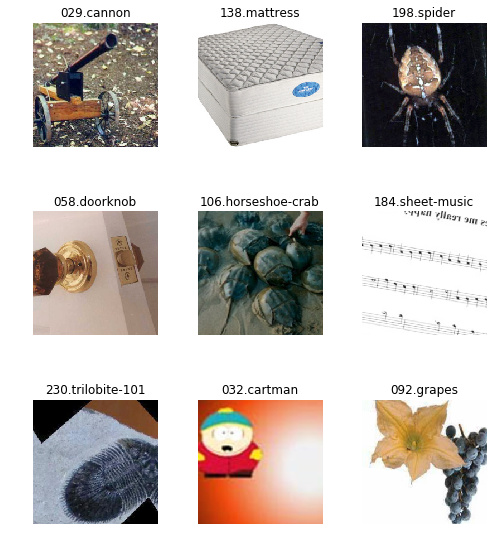

In [12]:
data.show_batch(rows=3, figsize=(7,8))

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['001.ak47',
  '002.american-flag',
  '003.backpack',
  '004.baseball-bat',
  '005.baseball-glove',
  '006.basketball-hoop',
  '007.bat',
  '008.bathtub',
  '009.bear',
  '010.beer-mug',
  '011.billiards',
  '012.binoculars',
  '013.birdbath',
  '014.blimp',
  '015.bonsai-101',
  '016.boom-box',
  '017.bowling-ball',
  '018.bowling-pin',
  '019.boxing-glove',
  '020.brain-101',
  '021.breadmaker',
  '022.buddha-101',
  '023.bulldozer',
  '024.butterfly',
  '025.cactus',
  '026.cake',
  '027.calculator',
  '028.camel',
  '029.cannon',
  '030.canoe',
  '031.car-tire',
  '032.cartman',
  '033.cd',
  '034.centipede',
  '035.cereal-box',
  '036.chandelier-101',
  '037.chess-board',
  '038.chimp',
  '039.chopsticks',
  '040.cockroach',
  '041.coffee-mug',
  '042.coffin',
  '043.coin',
  '044.comet',
  '045.computer-keyboard',
  '046.computer-monitor',
  '047.computer-mouse',
  '048.conch',
  '049.cormorant',
  '050.covered-wagon',
  '051.cowboy-hat',
  '052.crab-101',
  '053.desk-globe',
  

## Train model

In [14]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [15]:
learn.fit_one_cycle(8)

Total time: 18:31
epoch  train_loss  valid_loss  error_rate
1      1.879571    1.011569    0.221051    (02:32)
2      1.110209    0.741041    0.197332    (02:18)
3      1.038171    0.687231    0.183166    (02:15)
4      0.943997    0.644090    0.167188    (02:17)
5      0.758220    0.587072    0.153681    (02:17)
6      0.632211    0.550010    0.146269    (02:17)
7      0.539609    0.525428    0.140010    (02:15)
8      0.498013    0.524528    0.136221    (02:18)



In [16]:
learn.save('stage-1.v5')

In [17]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


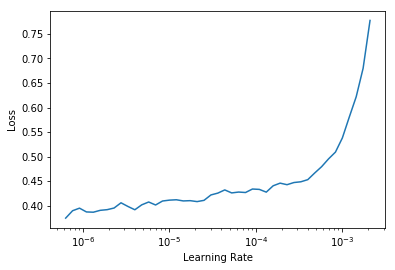

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(4, max_lr=slice(2e-6,2e-7))

Total time: 11:04
epoch  train_loss  valid_loss  error_rate
1      0.456497    0.519834    0.136057    (02:43)
2      0.452235    0.520085    0.137704    (02:47)
3      0.466417    0.520367    0.136221    (02:47)
4      0.454766    0.521080    0.137704    (02:46)



In [21]:
learn.save('stage-2.v5')

## Interpretation

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

In [23]:
interp.most_confused(min_val=2)

[('191.sneaker', '255.tennis-shoes', 11),
 ('069.fighter-jet', '251.airplanes-101', 7),
 ('136.mandolin', '063.electric-guitar-101', 5),
 ('030.canoe', '122.kayak', 4),
 ('159.people', '232.t-shirt', 4),
 ('233.tuning-fork', '180.screwdriver', 4),
 ('080.frog', '256.toad', 3),
 ('082.galaxy', '044.comet', 3),
 ('099.harpsichord', '091.grand-piano-101', 3),
 ('119.jesus-christ', '144.minotaur', 3),
 ('128.lathe', '141.microscope', 3),
 ('162.picnic-table', '135.mailbox', 3),
 ('165.pram', '244.wheelbarrow', 3),
 ('167.pyramid', '138.mattress', 3),
 ('180.screwdriver', '074.flashlight', 3),
 ('224.touring-bike', '146.mountain-bike', 3),
 ('227.treadmill', '126.ladder', 3),
 ('255.tennis-shoes', '191.sneaker', 3),
 ('257.clutter', '187.skyscraper', 3)]